In [1]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_4/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_4/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [2]:
# HLL
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst10"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[1.3074898663228558, 1.0729298939676633, 1.1764051628712513, 2.5278060890283354, 0.21506543727818148, 2.2197426522957127, 2.0103018702462325, 1.2233924501192257, 0.1366090176025953, 1.0116100863314113, 2.9995433401456104, 2.7969704102684814, 0.9328890198030704, 2.2067928376912427, 0.36426813019674603, 0.7511050103872654, 1.5134173343262844, 0.0941880178887465]
[0.21255798935626424, 0.5158285056790146, 0.6692360069265975, 0.22529543128314877, 1.9431983816730312, 0.848687524293393, 1.337709062621548, 0.9025250939306834, 0.03223557458037528, 1.8674875603213497, 0.06029012116310755, 0.279528097393238, 0.3646281940855584, 0.5931208440144471, 1.1354467365662437, 0.4212326949635973, 1.7938997414918851, 1.5902421267057452]
18 1.1998988064952385
18 0.6311784254705223


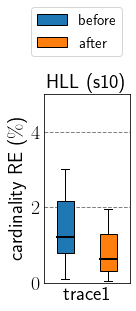

In [3]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("HLL (s10)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("hll.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [4]:
# PCSA
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst5", "inst9"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[1.3194447799556481, 0.21946542841961791, 0.5737981876823837, 0.631291438137404, 0.5463570797422268, 0.49748411921404334, 0.3385372269173628, 0.24567330467144777, 0.9284722652070494, 0.623425423801187, 0.7469270479392444, 0.9269362292663125, 1.185237094136884, 0.6963066709936746, 0.9197502664839349, 0.25908814222761334, 0.9090596392261692, 0.9022147375243783, 0.9398965687379315, 0.1264976174988606, 0.7202437440687278, 0.9487713661805678, 2.3314453694200528, 1.5137130096412286, 0.7616325711993582, 0.08524318663386833, 0.5018058407558781, 0.7622330543211271, 0.5189410752546757, 1.0334879755867037, 0.3857451035356921, 0.9713911242248418, 1.4461230335203352, 0.18926359256710254, 0.8621035862973722, 0.17792705862399374]
[0.18566144257046371, 1.568373732528696, 0.2979030561060951, 1.2769414459972812, 1.0500823788633702, 0.19929230894375075, 0.9920365813489371, 0.4876536785223463, 0.539751445419796, 1.6088365950294152, 0.06849817745920689, 0.64159241183276, 0.8902517434096641, 0.1504296317108

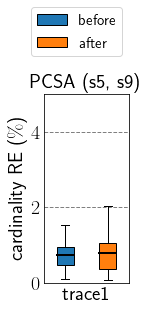

In [5]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("PCSA (s5, s9)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("pcsa.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [12]:
# Entropy
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst6", "inst7"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.15931502570273867, 1.4660002546011561, 29.249678323454205, 28.287660892372653, 0.12917337231136863, 1.1075831155024687, 29.29824927472973, 28.3941884606779, 0.6133840533914893, 1.1550246730609777, 29.757254315154324, 28.63469302446118, 0.11131437662496968, 1.4037905471035883, 29.367688407327826, 28.689205904384362, 0.11851917599897473, 0.5212700467267121, 29.520307592819307, 28.667516238468565, 0.20022785378346009, 2.4750092721104395, 29.84127672379818, 28.740020372798426, 3.521289887572701, 3.2435791490504817, 31.395901925811167, 25.871966618383496, 5.287339716384292, 5.450048714911205, 23.859287084279696, 24.44704426052574, 4.869375172537235, 6.572482644145579, 24.213998982151168, 23.36406449060951]
[0.2752045607508521, 1.368794398807859, 21.872048592517956, 20.782148785899487, 0.3922638511105988, 1.2617108093345888, 21.483733734827346, 20.56512047069788, 0.3159673835612084, 1.3728699731725549, 21.931753675636774, 20.926697806922316, 0.14507730602463056, 1.5206647265186368, 21.614

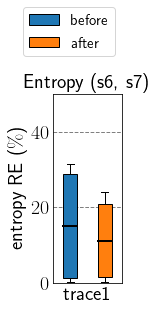

In [14]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("Entropy (s6, s7)", fontsize = 20)
plt.ylabel("entropy RE ($\%$)", fontsize = 20)
plt.ylim([0, 50])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("entropy.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [15]:
# MRAC
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst1"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)
print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.47565027799542325, 0.4496759487607219, 0.4487894991099607, 0.5017167380722098, 0.43878780550534013, 0.4446175918826172, 0.47803995648454545, 0.45554815761239587, 0.440258616634756, 0.48794024480806386, 0.4919158653795144, 0.44931773010382986, 0.49628463166339204, 0.4632007785655288, 0.45930899178100315, 0.5002644692291959, 0.47562820284486873, 0.4095971626082287, 0.4892757402733612, 0.46407497123644864, 0.44918267424798075, 0.4846087170095789, 0.4825075786280843, 0.47688644846133216, 0.5002360438589007, 0.48249142705043524, 0.476698871285777]
[0.5162762103168647, 0.46822525421724925, 0.47722355204748673, 0.4746799335853567, 0.48747105158352666, 0.4960928398115038, 0.4917879905504028, 0.48187545309636715, 0.4533603414278226, 0.47417074795772624, 0.45796396785160326, 0.4310137573128801, 0.5117772701526998, 0.496786674402954, 0.4642917513686167, 0.46598186761836047, 0.46231926300818044, 0.42446020698061915, 0.49269493116238766, 0.4513333777241103, 0.47722049218081003, 0.483559002201275

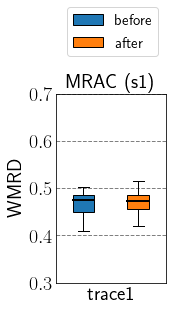

In [17]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRAC (s1)", fontsize = 20)
plt.ylabel("WMRD", fontsize = 20)
plt.ylim([0.3, 0.7])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrac.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [39]:
# MRB
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst2"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

before_list = before_list[5:10]
after_list = after_list[5:10]

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[1.406483867483451, 0.1505840572393503, 0.645180650582163, 1.554258138940991, 0.6214745836253797, 0.30284301606922126, 1.1483724451173354, 0.8212604128938791, 0.11569703446004033, 0.7982117161551897, 1.3707655717683358, 0.788883585637996, 0.625446747676912, 0.6784825554821999, 0.801952263882211, 0.9099483992676025, 0.7208504435319005, 1.4741840244310747]
[0.6980114261435627, 1.4336181751306596, 2.6878210321799116, 0.3997372097972629, 0.047318389197282366, 1.8055965196873618, 1.8600209913272676, 2.528431047808325, 0.9308388412142684, 1.0615888570288505, 3.558517755191929, 2.184468298913401, 1.5831180925271908, 1.798030329987755, 1.176025355977104, 0.8684244020403569, 1.9650005279678997, 0.9372236958443855]
5 0.7982117161551897
5 1.8055965196873618


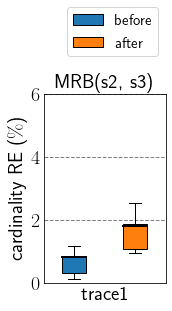

In [40]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("MRB(s2, s3)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrb.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [25]:
# CountSketch
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[2.122751602870819, 2.40675342779336, 2.2574305517719804, 3.026854043612031, 2.920911540253053, 2.4867767080176955, 2.165327481883912, 2.8338430479771217, 2.0801763696967863, 3.1647840102650178, 2.4043728828297497, 2.501538424006825, 3.0892459786789113, 3.492371581871997, 2.1431006915822626, 3.4934084504505627, 2.826626327388242, 1.9682200324546895]
[2.1269316704340024, 2.0262353583583144, 2.2443476965172575, 2.7191272005412976, 2.7736368650060497, 2.8213023958348162, 1.7632216090461936, 2.7633901767856774, 2.1300926963463613, 2.480106097501461, 2.7390734403319192, 2.5923464735795694, 2.939073230056783, 3.2464298224149104, 2.290274162883803, 3.5301613897486437, 2.7794413321566718, 1.9887273248100774]
18 2.49415756601226
18 2.6557368370604335


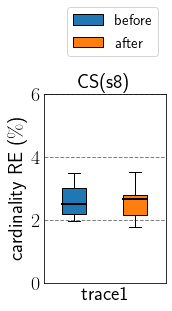

In [26]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CS(s8)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("cs.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [27]:
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "hf.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "hf.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)



[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (49, 1), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0)]
[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (49, 1), (50, 0), (50, 0)]
